In [89]:
import numpy as np
from scipy.linalg import eig 
from matplotlib import pylab as plt
#import matplotlib.cm as cm
import pandas as pd
import datetime


In [90]:
df_original = pd.read_csv('202207-citbike-tripdata.csv')

C:\Users\jwgd1\AppData\Local\Temp\ipykernel_8584\3516038589.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('202207-citbike-tripdata.csv')


In [91]:
df = df_original.copy()

In [92]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C09E4093905089BD,classic_bike,2022-07-23 11:34:57,2022-07-23 11:45:08,Melrose St & Broadway,4801.04,Myrtle Ave & Grove St,4816.05,40.697481,-73.935877,40.699050,-73.915160,member
1,374630DB5822C392,electric_bike,2022-07-29 18:19:08,2022-07-29 18:26:50,E 68 St & 3 Ave,6896.16,E 85 St & York Ave,7146.04,40.767128,-73.962246,40.775369,-73.948034,member
2,4F73CA25880A1215,electric_bike,2022-07-16 16:30:58,2022-07-16 17:39:18,W 37 St & 10 Ave,6611.02,Knickerbocker Ave & Cooper St,4582.05,40.756604,-73.997901,40.690810,-73.904480,member
3,ECD6EE19C0CC1D31,electric_bike,2022-07-17 17:35:57,2022-07-17 18:03:36,W 37 St & 10 Ave,6611.02,6 Ave & Broome St,5610.09,40.756604,-73.997901,40.724310,-74.004730,member
4,44D0987673B9997D,classic_bike,2022-07-11 07:56:29,2022-07-11 07:59:15,E 68 St & 3 Ave,6896.16,E 66 St & Madison Ave,6969.08,40.767128,-73.962246,40.768009,-73.968453,member


### Warm-up

#### 1. Using the start time and end time, compute the duration of each ride in minutes and plot the histogram of ride durations.


In [93]:
df = df_original.copy()
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['started_at'] = pd.to_datetime(df['started_at'])
df['duration'] = (df['ended_at'] - df['started_at']).apply(lambda x: x.value) / 10**9
df = df[(df['duration'] > 0) & (df['duration'] < 3600*3)]
#print(df['duration'])

(array([2.537686e+06, 6.939260e+05, 1.642440e+05, 4.775000e+04,
        1.867000e+04, 9.248000e+03, 5.408000e+03, 3.299000e+03,
        2.189000e+03, 1.416000e+03]),
 array([1.0000e+00, 1.0808e+03, 2.1606e+03, 3.2404e+03, 4.3202e+03,
        5.4000e+03, 6.4798e+03, 7.5596e+03, 8.6394e+03, 9.7192e+03,
        1.0799e+04]),
 <BarContainer object of 10 artists>)

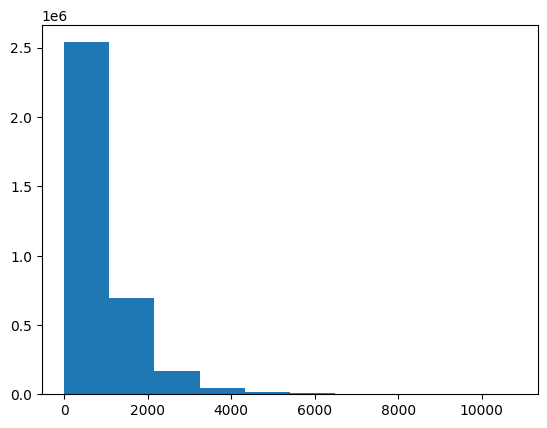

In [94]:
# durations = []
# format_data = "%Y-%m-%d %H:%M:%S"
# for index, row in df.iterrows():
#     duration = (datetime.strptime(df.iloc[index,3], format_data) - datetime.strptime(df.iloc[index,2], format_data)).total_seconds()
#     if duration > 3600 * 3 or duration < 0:
#         df.drop(index, inplace=True)
#     else:
#         durations.append(duration)
#     if index % 10000 == 0:
#         print('Working on', index)
plt.hist(df['duration'])

In [95]:
df_member = df[df['member_casual'] == 'member']
p = len(df_member[df_member['duration'] > 20*60]) / len(df_member)
print(p)

df_more25 = df[df['duration'] > 25*60]
p2 = len(df_more25[df_more25['member_casual'] == 'member']) / len(df_more25)
print(p2)

0.18614266381307384
0.5839303954997338


In [96]:
df['weekday'] = df['started_at'].dt.dayofweek
df = df[df['weekday'] < 5]

In [97]:
# df['morning'] = (df['started_at'].apply(lambda a:a.time()) < datetime.time(12, 0, 0)) & (df['started_at'].apply(lambda a:a.time()) > datetime.time(7, 0, 0))
# df['evening'] = (df['started_at'].apply(lambda a:a.time()) < datetime.time(22, 0, 0)) & (df['started_at'].apply(lambda a:a.time()) > datetime.time(17, 0, 0))


In [98]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,weekday
1,374630DB5822C392,electric_bike,2022-07-29 18:19:08,2022-07-29 18:26:50,E 68 St & 3 Ave,6896.16,E 85 St & York Ave,7146.04,40.767128,-73.962246,40.775369,-73.948034,member,462.0,4
4,44D0987673B9997D,classic_bike,2022-07-11 07:56:29,2022-07-11 07:59:15,E 68 St & 3 Ave,6896.16,E 66 St & Madison Ave,6969.08,40.767128,-73.962246,40.768009,-73.968453,member,166.0,0
5,A80F03B56110AFF8,classic_bike,2022-07-14 19:35:53,2022-07-14 19:50:06,Clinton Ave & Flushing Ave,4762.04,Bergen St & 4 Ave,4322.06,40.697940,-73.969868,40.682564,-73.979898,member,853.0,3
6,D967C4FDF71ADE61,classic_bike,2022-07-26 20:18:17,2022-07-26 20:26:57,E 68 St & 3 Ave,6896.16,E 85 St & York Ave,7146.04,40.767128,-73.962246,40.775369,-73.948034,member,520.0,1
7,62DA916392DE2A17,electric_bike,2022-07-13 06:46:50,2022-07-13 06:50:26,E 89 St & York Ave,7204.08,E 85 St & York Ave,7146.04,40.777945,-73.946041,40.775369,-73.948034,member,216.0,2


In [99]:
stations = df.groupby(['start_station_name'])['start_station_name'].count().reset_index(name='count').sort_values(['count'], ascending=False)
temp = stations[(stations['count'] > 6000)]
temp

,start_station_name,count
1546,West St & Chambers St,10556
1423,W 21 St & 6 Ave,9580
8,1 Ave & E 68 St,8923
272,6 Ave & W 33 St,8839
444,Broadway & W 25 St,8345
453,Broadway & W 58 St,8305
722,E 33 St & 1 Ave,8244
1547,West St & Liberty St,7877
421,Broadway & E 14 St,7805
1009,Lafayette St & E 8 St,7586


In [106]:
station1_name = 'Lafayette St & E 8 St'
# df['morning'] = (df['started_at'].apply(lambda a:a.time()) < datetime.time(12, 0, 0)) & (df['started_at'].apply(lambda a:a.time()) > datetime.time(7, 0, 0))
# df['evening'] = (df['started_at'].apply(lambda a:a.time()) < datetime.time(22, 0, 0)) & (df['started_at'].apply(lambda a:a.time()) > datetime.time(17, 0, 0))
df_1_morning_depart = df[(df['start_station_name'] == station1_name) & (df['started_at'].apply(lambda a:a.time()) < datetime.time(12, 0, 0)) & (df['started_at'].apply(lambda a:a.time()) > datetime.time(7, 0, 0))]
df_1_morning_arrive = df[(df['end_station_name'] == station1_name) & (df['ended_at'].apply(lambda a:a.time()) < datetime.time(12, 0, 0)) & (df['ended_at'].apply(lambda a:a.time()) > datetime.time(7, 0, 0))]
df_1_evening_depart = df[(df['start_station_name'] == station1_name) & (df['started_at'].apply(lambda a:a.time()) < datetime.time(22, 0, 0)) & (df['started_at'].apply(lambda a:a.time()) > datetime.time(17, 0, 0))]
df_1_evening_arrive = df[(df['end_station_name'] == station1_name) & (df['ended_at'].apply(lambda a:a.time()) < datetime.time(22, 0, 0)) & (df['ended_at'].apply(lambda a:a.time()) > datetime.time(17, 0, 0))]

In [111]:
# discretize morning into blocks of 5 minutes
stepsize = datetime.timedelta(minutes=5)
# add 19 hours to proceed to the next day
next_day = datetime.timedelta(hours=19)
# we calculate morning part first
# start from July 1st morning
checkpoint = datetime.datetime(2022,7,1,7,0)
# find capacity = 73 for this station online
N1_morning = np.zeros((45,45))
# if date of checkpoint is prior to August 1st
while checkpoint < datetime.datetime(2022,8,1,0,0):
    # records of numbers of bikes
    bikes = [0]
    # while time of checkpoint is still within the "morning" period
    while checkpoint.time() < datetime.time(12,0):
        arrival_morning = len(df_1_morning_arrive[(df_1_morning_arrive['ended_at'] > checkpoint) & (df_1_morning_arrive['ended_at'] < checkpoint + stepsize)])
        departure_morning = len(df_1_morning_depart[(df_1_morning_depart['started_at'] > checkpoint) & (df_1_morning_depart['started_at'] < checkpoint + stepsize)])
        bikes.append(bikes[-1] + arrival_morning - departure_morning)
        checkpoint += stepsize
    checkpoint += next_day
    # get rid of negative values
    nega = min(bikes)
    bikes = [min(x - nega, 44) for x in bikes]
    #print(bikes)
    # add bike number data to 
    for i in range(len(bikes)-1):
        N1_morning[bikes[i],bikes[i+1]] += 1
print(N1_morning)

[[604.  12.   7. ...   0.   0.   0.]
 [ 10.  20.  14. ...   0.   0.   0.]
 [  6.  12.  24. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   2.   5.]
 [  0.   0.   0. ...   0.   1.   6.]
 [  0.   0.   0. ...   0.   2. 475.]]


In [112]:
for i in range(len(N1_morning)):
    sum_row = np.sum(N1_morning[i])
    if sum_row != 0:
        for j in range(len(N1_morning[i])):
            N1_morning[i][j] /= sum_row
print(N1_morning)

[[0.96178344 0.01910828 0.0111465  ... 0.         0.         0.        ]
 [0.1754386  0.35087719 0.24561404 ... 0.         0.         0.        ]
 [0.08695652 0.17391304 0.34782609 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.22222222 0.55555556]
 [0.         0.         0.         ... 0.         0.125      0.75      ]
 [0.         0.         0.         ... 0.         0.0041841  0.99372385]]


In [123]:
# also the evening part
# start from July 1st evening (5 pm to 10 pm)
checkpoint = datetime.datetime(2022,7,1,17,0)
N1_evening = np.zeros((45,45))
# if date of checkpoint is prior to August 1st
while checkpoint < datetime.datetime(2022,8,1,0,0):
    # records of numbers of bikes
    bikes = [0]
    # while time of checkpoint is still within the "evening" period
    while checkpoint.time() < datetime.time(22,0):
        arrival_evening = len(df_1_evening_arrive[(df_1_evening_arrive['ended_at'] > checkpoint) & (df_1_evening_arrive['ended_at'] < checkpoint + stepsize)])
        departure_evening = len(df_1_evening_depart[(df_1_evening_depart['started_at'] > checkpoint) & (df_1_evening_depart['started_at'] < checkpoint + stepsize)])
        bikes.append(bikes[-1] + arrival_evening - departure_evening)
        checkpoint += stepsize
    checkpoint += next_day
    # get rid of negative values
    nega = min(bikes)
    bikes = [min(x - nega,44) for x in bikes]
    # add bike number data to 
    for i in range(len(bikes)-1):
        N1_evening[bikes[i],bikes[i+1]] += 1
print(N1_evening)

[[621.  10.   7. ...   0.   0.   0.]
 [ 16.  13.   7. ...   0.   0.   0.]
 [  6.  11.  28. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   2.   2.]
 [  0.   0.   0. ...   3.   1.   2.]
 [  0.   0.   0. ...   3.   6. 149.]]


In [124]:
for i in range(len(N1_evening)):
    sum_row = np.sum(N1_evening[i])
    if sum_row != 0:
        for j in range(len(N1_evening[i])):
            N1_evening[i][j] /= sum_row
print(N1_evening)

[[0.96879875 0.01560062 0.01092044 ... 0.         0.         0.        ]
 [0.37209302 0.30232558 0.1627907  ... 0.         0.         0.        ]
 [0.0952381  0.17460317 0.44444444 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.28571429 0.28571429]
 [0.         0.         0.         ... 0.3        0.1        0.2       ]
 [0.         0.         0.         ... 0.01829268 0.03658537 0.90853659]]


In [153]:
# N1_morning = N1_morning[:50,:50]
S, U = eig(N1_morning.T)
stationary1_m = np.array(U[:, np.where(np.abs(S - 1.) < 1e-8)[0][0]].flat)
stationary1_m = stationary1_m / np.sum(stationary1_m)
print(stationary1_m.real)

[-3.28085564e-14 -2.27530061e-15 -2.15313226e-15 -1.68921113e-15
 -1.58456795e-15 -1.08865650e-15 -1.05293431e-15 -7.14231159e-16
 -8.94820143e-17  3.60779833e-16  3.53581518e-16  2.54912361e-16
  3.17096440e-16  4.17648826e-16  1.93742503e-16  1.79082703e-16
  1.53747801e-16  2.99942430e-16  2.07660477e-16  1.79717082e-16
  2.77349821e-16  3.34152448e-16  2.15025609e-16  3.87065124e-16
  8.54220182e-17  6.11093400e-17  1.60654650e-16  8.97095482e-17
  1.75274558e-16  1.25736632e-16  1.80641918e-16  9.16360465e-17
  2.06205526e-16  2.78260622e-16  5.59404402e-16  5.11081038e-06
  4.59972934e-05  3.18087360e-04  8.74719894e-05  1.21462678e-04
  4.64585290e-04  3.40177208e-03  1.18503213e-03  5.14718025e-03
  9.89223300e-01]


In [154]:
S, U = eig(N1_evening.T)
stationary1_e = np.array(U[:, np.where(np.abs(S - 1.) < 1e-8)[0][0]].flat)
stationary1_e = stationary1_e / np.sum(stationary1_e)
print(stationary1_e.real)

[ 7.20315672e-01  3.71761169e-02  4.86895809e-02  3.46118237e-02
  3.11421977e-02  2.23019410e-02  2.15871165e-02  1.93583922e-02
  1.77081157e-02  1.50204277e-02  1.08861744e-02  9.26297208e-03
  4.32398808e-03  2.56953672e-03  1.85881733e-03  1.82895347e-03
  3.21881500e-04  4.00819307e-04  2.74465430e-04  1.43602372e-04
  7.60970524e-05  5.04923704e-05  3.56676037e-05  1.06574196e-05
  1.35319095e-05  7.60992297e-06  9.43247505e-06  5.49900010e-06
  2.72159142e-06  2.05729210e-06  8.39625080e-07  5.23122323e-07
  7.98098449e-07  6.83466913e-07  2.27317392e-07  7.84482204e-08
  2.08049104e-07  1.49752653e-07  1.30484366e-07 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00]


Station 2

In [155]:
station2_name = '12 Ave & W 40 St'
# df['morning'] = (df['started_at'].apply(lambda a:a.time()) < datetime.time(12, 0, 0)) & (df['started_at'].apply(lambda a:a.time()) > datetime.time(7, 0, 0))
# df['evening'] = (df['started_at'].apply(lambda a:a.time()) < datetime.time(22, 0, 0)) & (df['started_at'].apply(lambda a:a.time()) > datetime.time(17, 0, 0))
df_2_morning_depart = df[(df['start_station_name'] == station2_name) & (df['started_at'].apply(lambda a:a.time()) < datetime.time(12, 0, 0)) & (df['started_at'].apply(lambda a:a.time()) > datetime.time(7, 0, 0))]
df_2_morning_arrive = df[(df['end_station_name'] == station2_name) & (df['ended_at'].apply(lambda a:a.time()) < datetime.time(12, 0, 0)) & (df['ended_at'].apply(lambda a:a.time()) > datetime.time(7, 0, 0))]
df_2_evening_depart = df[(df['start_station_name'] == station2_name) & (df['started_at'].apply(lambda a:a.time()) < datetime.time(22, 0, 0)) & (df['started_at'].apply(lambda a:a.time()) > datetime.time(17, 0, 0))]
df_2_evening_arrive = df[(df['end_station_name'] == station2_name) & (df['ended_at'].apply(lambda a:a.time()) < datetime.time(22, 0, 0)) & (df['ended_at'].apply(lambda a:a.time()) > datetime.time(17, 0, 0))]

In [156]:
# discretize morning into blocks of 5 minutes
stepsize = datetime.timedelta(minutes=5)
# add 19 hours to proceed to the next day
next_day = datetime.timedelta(hours=19)
# we calculate morning part first
# start from July 1st morning
checkpoint = datetime.datetime(2022,7,1,7,0)
# find capacity = 73 for this station online
N2_morning = np.zeros((46,46))
# if date of checkpoint is prior to August 1st
while checkpoint < datetime.datetime(2022,8,1,0,0):
    # records of numbers of bikes
    bikes = [0]
    # while time of checkpoint is still within the "morning" period
    while checkpoint.time() < datetime.time(12,0):
        arrival_morning = len(df_2_morning_arrive[(df_2_morning_arrive['ended_at'] > checkpoint) & (df_2_morning_arrive['ended_at'] < checkpoint + stepsize)])
        departure_morning = len(df_2_morning_depart[(df_2_morning_depart['started_at'] > checkpoint) & (df_2_morning_depart['started_at'] < checkpoint + stepsize)])
        bikes.append(bikes[-1] + arrival_morning - departure_morning)
        checkpoint += stepsize
    checkpoint += next_day
    # get rid of negative values
    nega = min(bikes)
    bikes = [min(x - nega, 45) for x in bikes]
    #print(bikes)
    # add bike number data to 
    for i in range(len(bikes)-1):
        N2_morning[bikes[i],bikes[i+1]] += 1
print(N2_morning)

[[630.  14.  11. ...   0.   0.   0.]
 [ 10.  37.  17. ...   0.   0.   0.]
 [ 12.  22.  46. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   2.   0.   0.]
 [  0.   0.   0. ...   1.   3.   1.]
 [  0.   0.   0. ...   0.   1.   0.]]


In [157]:
for i in range(len(N2_morning)):
    sum_row = np.sum(N2_morning[i])
    if sum_row != 0:
        for j in range(len(N2_morning[i])):
            N2_morning[i][j] /= sum_row
print(N2_morning)

[[0.95454545 0.02121212 0.01666667 ... 0.         0.         0.        ]
 [0.125      0.4625     0.2125     ... 0.         0.         0.        ]
 [0.10526316 0.19298246 0.40350877 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.4        0.         0.        ]
 [0.         0.         0.         ... 0.2        0.6        0.2       ]
 [0.         0.         0.         ... 0.         1.         0.        ]]


In [158]:
# also the evening part
# start from July 1st evening (5 pm to 10 pm)
checkpoint = datetime.datetime(2022,7,1,17,0)
N2_evening = np.zeros((46,46))
# if date of checkpoint is prior to August 1st
while checkpoint < datetime.datetime(2022,8,1,0,0):
    # records of numbers of bikes
    bikes = [0]
    # while time of checkpoint is still within the "evening" period
    while checkpoint.time() < datetime.time(22,0):
        arrival_evening = len(df_2_evening_arrive[(df_2_evening_arrive['ended_at'] > checkpoint) & (df_2_evening_arrive['ended_at'] < checkpoint + stepsize)])
        departure_evening = len(df_2_evening_depart[(df_2_evening_depart['started_at'] > checkpoint) & (df_2_evening_depart['started_at'] < checkpoint + stepsize)])
        bikes.append(bikes[-1] + arrival_evening - departure_evening)
        checkpoint += stepsize
    checkpoint += next_day
    # get rid of negative values
    nega = min(bikes)
    bikes = [min(x - nega,45) for x in bikes]
    # add bike number data to 
    for i in range(len(bikes)-1):
        N2_evening[bikes[i],bikes[i+1]] += 1
print(N2_evening)

[[633.   6.   5. ...   0.   0.   0.]
 [  5.  30.   0. ...   0.   0.   0.]
 [  3.   1.   7. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   1.   0.   2.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.  13.]]


In [159]:
for i in range(len(N2_evening)):
    sum_row = np.sum(N2_evening[i])
    if sum_row != 0:
        for j in range(len(N2_evening[i])):
            N2_evening[i][j] /= sum_row
print(N2_evening)

[[0.96788991 0.00917431 0.00764526 ... 0.         0.         0.        ]
 [0.12195122 0.73170732 0.         ... 0.         0.         0.        ]
 [0.15789474 0.05263158 0.36842105 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.33333333 0.         0.66666667]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.92857143]]


In [160]:
S, U = eig(N2_morning.T)
stationary2_m = np.array(U[:, np.where(np.abs(S - 1.) < 1e-8)[0][0]].flat)
stationary2_m = stationary2_m / np.sum(stationary2_m)
print(stationary2_m.real)


[5.27559650e-01 6.59466333e-02 8.85290262e-02 9.23191238e-02
 4.63257668e-02 4.79035309e-02 3.10111861e-02 2.89343191e-02
 1.63431279e-02 1.24521651e-02 8.40385412e-03 8.60267735e-03
 5.33642412e-03 5.44510694e-03 3.80129300e-03 5.64385740e-03
 2.12598694e-03 1.18573088e-03 7.37359552e-04 3.99149961e-04
 4.64496880e-04 1.43181700e-04 1.97480436e-04 9.42077130e-05
 6.49423505e-05 2.26451182e-05 7.07659945e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [161]:
S, U = eig(N2_evening.T)
stationary2_e = np.array(U[:, np.where(np.abs(S - 1.) < 1e-8)[0][0]].flat)
stationary2_e = stationary2_e / np.sum(stationary2_e)
print(stationary2_e.real)

[ 0.06893929  0.00570649  0.00365438  0.00449138  0.00335545  0.00633206
  0.00663375  0.0079431   0.01136924  0.01622749  0.01076262  0.01367231
  0.02038696  0.03050147  0.02286538  0.02615352  0.03118899  0.03458227
  0.03576967  0.03120661  0.0301773   0.03595303  0.03638848  0.05334081
  0.03347352  0.03887778  0.03412773  0.0353857   0.02460147  0.0267642
  0.02727019  0.03164628  0.04610283  0.03112636  0.0146575   0.01006702
  0.00988031  0.01076038  0.0070716   0.00872913  0.00155632  0.00351373
  0.00175686  0.00532539 -0.          0.04970364]
